In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv('dataset.csv')
df.head()


,country_name,country_code,indicator_name,indicator_code,debt
0,Afghanistan,AFG,"""Disbursements on external debt, long-term (DI...",DT.DIS.DLXF.CD,72894453.7
1,Afghanistan,AFG,"""Interest payments on external debt, long-term...",DT.INT.DLXF.CD,53239440.1
2,Afghanistan,AFG,"""PPG, bilateral (AMT, current US$)""",DT.AMT.BLAT.CD,61739336.9
3,Afghanistan,AFG,"""PPG, bilateral (DIS, current US$)""",DT.DIS.BLAT.CD,49114729.4
4,Afghanistan,AFG,"""PPG, bilateral (INT, current US$)""",DT.INT.BLAT.CD,39903620.1


# Total Numbers of Distinct Countries

In [2]:

total_countries = df['country_name'].nunique()
print(f'Total number of distinct countries: {total_countries}')

Total number of distinct countries: 124


# The Top 10 Highest Debt Countries

Top 10 highest debt countries:
                                   country_name          debt
0                                         China  2.857935e+11
1                                        Brazil  2.806240e+11
2                                    South Asia  2.476087e+11
3  Least developed countries: UN classification  2.128810e+11
4                            Russian Federation  1.912891e+11
5                                      IDA only  1.790481e+11
6                                        Turkey  1.511258e+11
7                                         India  1.336271e+11
8                                        Mexico  1.245968e+11
9                                     Indonesia  1.134357e+11


C:\Users\Rafael\AppData\Local\Temp\ipykernel_9524\3438809666.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_highest_debt, x='debt', y='country_name', palette='viridis')


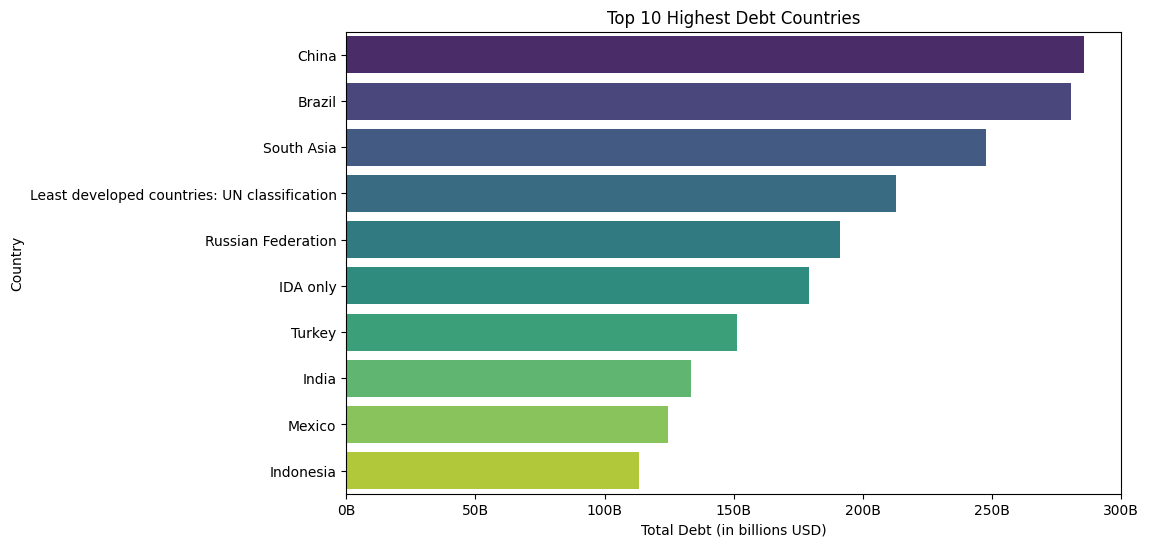

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame containing the debt data
# Calculate top 10 highest debt countries
top_10_highest_debt = df.groupby('country_name')['debt'].sum().nlargest(10).reset_index()

print("Top 10 highest debt countries:")
print(top_10_highest_debt)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_highest_debt, x='debt', y='country_name', palette='viridis')

# Formatting x-axis ticks to show values in billions
def billions_formatter(x, pos):
    return f'{x / 1e9:.0f}B'

plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.title('Top 10 Highest Debt Countries')
plt.xlabel('Total Debt (in billions USD)')
plt.ylabel('Country')
plt.show()


# The Top 10 Lowest Debt Countries

Top 10 lowest debt countries:
            country_name         debt
0  Sao Tome and Principe   44798032.5
1                  Tonga   55209304.8
2                Comoros   57568483.2
3            Timor-Leste   71000959.2
4           Turkmenistan   95135629.3
5        Solomon Islands  105104467.3
6                  Samoa  112946425.5
7                Somalia  119614074.9
8                Eritrea  132493809.3
9               Dominica  138044299.8


C:\Users\Rafael\AppData\Local\Temp\ipykernel_15224\2885198589.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lowest_debt, x='debt', y='country_name', palette='viridis')


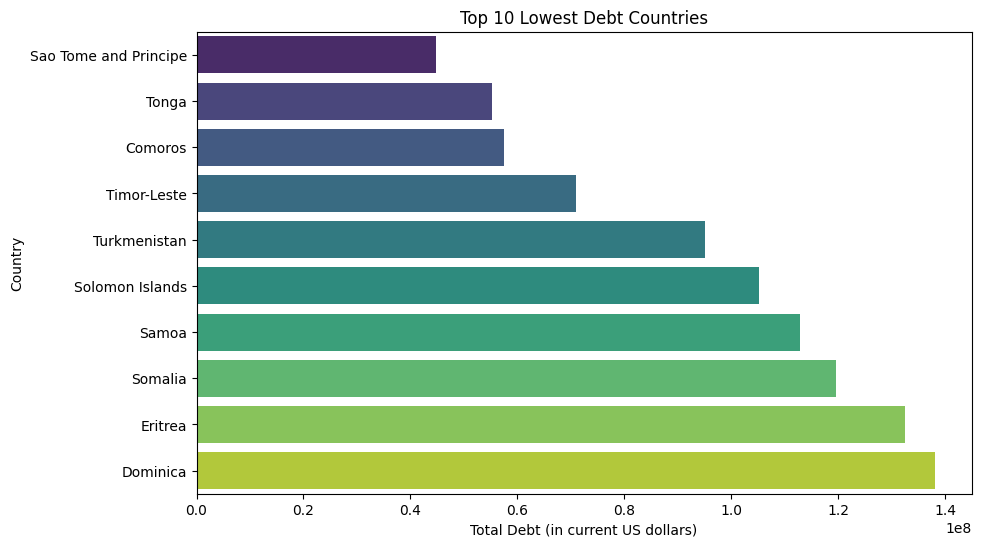

In [4]:
top_10_lowest_debt = df.groupby('country_name')['debt'].sum().nsmallest(10).reset_index()

print("Top 10 lowest debt countries:")
print(top_10_lowest_debt)

# Plotting the top 10 lowest debt countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_lowest_debt, x='debt', y='country_name', palette='viridis')
plt.title('Top 10 Lowest Debt Countries')
plt.xlabel('Total Debt (in current US dollars(hundred million))')
plt.ylabel('Country')
plt.show()

# The Amount of Debt of the Philippines

In [5]:
philippines_debt = df[df['country_name'] == 'Philippines']['debt'].sum()
print(f"The amount of debt of the Philippines: {philippines_debt} USD")


The amount of debt of the Philippines: 25151706784.8 USD


# The Debt of the Surrounding Countries of the Philippines

C:\Users\Rafael\AppData\Local\Temp\ipykernel_9524\3381643383.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=debt_sum, x='debt', y='country_name', palette='viridis')


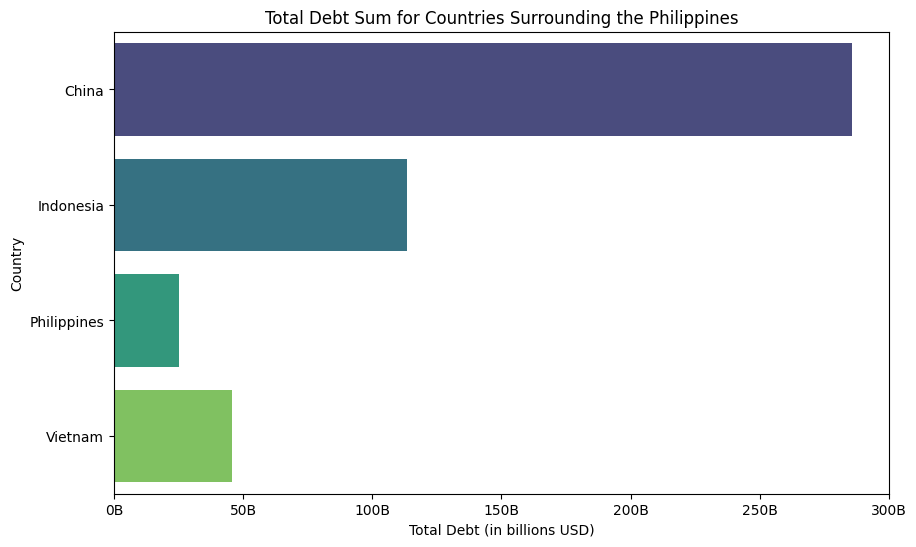

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame containing the debt data
# Filter data for the countries surrounding the Philippines

countries = ['China', 'Taiwan', 'Vietnam', 'Malaysia', 'Indonesia', 'Philippines']

surrounding_countries_debt = df[df['country_name'].isin(countries)]

# Calculate total debt sum for each country
debt_sum = surrounding_countries_debt.groupby('country_name')['debt'].sum().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=debt_sum, x='debt', y='country_name', palette='viridis')

# Formatting x-axis ticks to show values in billions
def billions_formatter(x, pos):
    return f'{x / 1e9:.0f}B'

plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.title('Total Debt Sum for Countries Surrounding the Philippines')
plt.xlabel('Total Debt (in billions USD)')
plt.ylabel('Country')
plt.show()
